<a href="https://colab.research.google.com/github/ain3ko/GamePopularAnalytic/blob/main/GamePopular_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Preparation**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import kagglehub

path = kagglehub.dataset_download("beridzeg45/video-games")
print("Path to dataset files:", path)

100%|██████████| 723k/723k [00:00<00:00, 1.03MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/beridzeg45/video-games/versions/3


In [3]:
df = pd.read_csv(path + '/all_video_games(cleaned).csv')
df.head()

,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               14034 non-null  object 
 1   Release Date        13991 non-null  object 
 2   Developer           13917 non-null  object 
 3   Publisher           13917 non-null  object 
 4   Genres              14034 non-null  object 
 5   Product Rating      11005 non-null  object 
 6   User Score          11714 non-null  float64
 7   User Ratings Count  11299 non-null  float64
 8   Platforms Info      14055 non-null  object 
dtypes: float64(2), object(7)
memory usage: 988.4+ KB


## **Preprocessing**

In [5]:
df.describe()

,User Score,User Ratings Count
count,11714.000000,11299.000000
mean,6.894852,245.642977
std,1.392213,1847.895353
min,0.300000,5.000000
25%,6.200000,14.000000
50%,7.200000,34.000000
75%,7.900000,111.000000
max,10.000000,163419.000000


In [6]:
df.isnull().sum()

,0
Title,21
Release Date,64
Developer,138
Publisher,138
Genres,21
Product Rating,3050
User Score,2341
User Ratings Count,2756
Platforms Info,0


In [7]:
df.duplicated().sum()

20

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['Total rating']=df['User Score']*df['User Ratings Count']
df.head()

,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info,Total rating
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",96.6
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5...",NaN
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas...",NaN
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'...",6240.0
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'...",65.0


In [10]:
df['Release Date']=pd.to_datetime(df['Release Date'])

In [11]:
df['Release Year']=df['Release Date'].dt.year
df.head()

,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info,Total rating,Release Year
0,Ziggurat (2012),2012-02-17,Action Button Entertainment,Freshuu Inc.,Action,NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",96.6,2012.0
1,4X4 EVO 2,2001-11-15,Terminal Reality,Gathering,Auto Racing Sim,Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5...",NaN,2001.0
2,MotoGP 2 (2001),2002-01-22,Namco,Namco,Auto Racing Sim,Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas...",NaN,2002.0
3,Gothic 3,2006-11-14,Piranha Bytes,Aspyr,Western RPG,Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'...",6240.0,2006.0
4,Siege Survival: Gloria Victis,2021-05-18,FishTankStudio,Black Eye Games,RPG,NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'...",65.0,2021.0


In [12]:
import re

def extract_platform(platform_info):
    match = re.search(r"'Platform': '([^']+)'", platform_info)
    return match.group(1) if match else None

df['Platform Name'] = df['Platforms Info'].apply(extract_platform)

print(df[['Platforms Info', 'Platform Name']].head())


                                      Platforms Info      Platform Name
0  [{'Platform': 'iOS (iPhone/iPad)', 'Platform M...  iOS (iPhone/iPad)
1  [{'Platform': 'Xbox', 'Platform Metascore': '5...               Xbox
2  [{'Platform': 'PlayStation 2', 'Platform Metas...      PlayStation 2
3  [{'Platform': 'PC', 'Platform Metascore': '63'...                 PC
4  [{'Platform': 'PC', 'Platform Metascore': '69'...                 PC


In [13]:
platform_counts = df['Platform Name'].value_counts()
print(platform_counts)

Platform Name
PC                   4500
iOS (iPhone/iPad)    1260
PlayStation 4        1005
PlayStation 2         956
Xbox 360              861
Nintendo Switch       790
PlayStation 3         720
DS                    578
Wii                   436
Xbox One              409
Game Boy Advance      373
3DS                   342
Xbox                  340
PSP                   338
PlayStation Vita      217
GameCube              192
PlayStation 5         191
PlayStation           166
Dreamcast              99
Wii U                  93
Xbox Series X          90
Nintendo 64            68
Meta Quest              2
Name: count, dtype: int64


## **EDA**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [15]:
Most_Famous_Games_of_all_time=df.sort_values(by='Total rating',ascending=False).head(25)
Most_Famous_Games_of_all_time

,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info,Total rating,Release Year,Platform Name
10941,The Last of Us Part II,2020-06-19,Naughty Dog,Sony Interactive Entertainment,Survival,Rated M For Mature,5.8,163419.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",947830.2,2020.0,PlayStation 4
13678,Cyberpunk 2077,2020-12-10,CD Projekt Red Studio,CD Projekt Red Studio,Action RPG,Rated M For Mature,7.1,35194.0,"[{'Platform': 'PC', 'Platform Metascore': '86'...",249877.4,2020.0,PC
7377,God of War,2018-04-20,SCE Santa Monica,Sony Interactive Entertainment,Linear Action Adventure,Rated M For Mature,9.1,24855.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",226180.5,2018.0,PlayStation 4
7591,Red Dead Redemption 2,2018-10-26,Rockstar Games,Rockstar Games,Open-World Action,Rated M For Mature,8.8,23875.0,"[{'Platform': 'Xbox One', 'Platform Metascore'...",210100.0,2018.0,Xbox One
13391,Ghost of Tsushima,2020-07-17,Sucker Punch,Sony Interactive Entertainment,Open-World Action,Rated M For Mature,9.1,21863.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",198953.3,2020.0,PlayStation 4
6075,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,Nintendo,Open-World Action,Rated E +10 For Everyone +10,8.8,22216.0,"[{'Platform': 'Wii U', 'Platform Metascore': '...",195500.8,2017.0,Wii U
2930,The Last of Us Remastered,2014-07-29,Naughty Dog,SCEA,Linear Action Adventure,Rated M For Mature,9.2,20141.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",185297.2,2014.0,PlayStation 4
7612,The Witcher 3: Wild Hunt,2015-05-19,CD Projekt Red Studio,Warner Bros. Interactive Entertainment,Action RPG,Rated M For Mature,9.2,19581.0,"[{'Platform': 'PC', 'Platform Metascore': '93'...",180145.2,2015.0,PC
3368,Uncharted 4: A Thief's End,2016-05-10,Naughty Dog,Sony Interactive Entertainment,Linear Action Adventure,Rated T For Teen,8.8,17412.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",153225.6,2016.0,PlayStation 4
3212,Death Stranding,2019-11-08,Kojima Productions,Sony Interactive Entertainment,Open-World Action,Rated M For Mature,7.4,18746.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",138720.4,2019.0,PlayStation 4


In [16]:
fig = px.scatter(Most_Famous_Games_of_all_time, x='Release Year', y='Total rating', size='Total rating', color='Title',title='Most Famous Games of All time ',log_x=True, size_max=60)
fig.show(render='iframe')

In [17]:
fig=px.bar(Most_Famous_Games_of_all_time,x='Title',y='Total rating',color='Total rating',title='Most Famous Games of All time ')
fig.show(render='iframe')

In [18]:
Most_popular_game_each_Year=df.loc[df.groupby(by=['Release Year'])['Total rating'].idxmax()]
Most_popular_game_each_Year

,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info,Total rating,Release Year,Platform Name
2209,Full Throttle,1995-04-30,LucasArts,LucasArts,Point-and-Click,Rated T For Teen,8.5,211.0,"[{'Platform': 'PC', 'Platform Metascore': '86'...",1793.5,1995.0,PC
11962,Resident Evil,1996-03-30,Capcom,Capcom,Survival,Rated M For Mature,9.4,1326.0,"[{'Platform': 'PlayStation', 'Platform Metasco...",12464.4,1996.0,PlayStation
9886,Fallout,1997-10-09,Black Isle Studios,Interplay,Western RPG,Rated M For Mature,8.8,1471.0,"[{'Platform': 'PC', 'Platform Metascore': '89'...",12944.8,1997.0,PC
6296,The Legend of Zelda: Ocarina of Time,1998-11-23,Nintendo,Nintendo,Open-World Action,Rated E For Everyone,9.1,8711.0,"[{'Platform': 'Nintendo 64', 'Platform Metasco...",79270.1,1998.0,Nintendo 64
9502,Age of Empires II: The Age of Kings,1999-09-30,Ensemble Studios,Microsoft Game Studios,Command RTS,Rated T For Teen,9.0,1416.0,"[{'Platform': 'PC', 'Platform Metascore': '92'...",12744.0,1999.0,PC
2535,The Legend of Zelda: Majora's Mask,2000-10-25,Nintendo,Nintendo,Open-World Action,Rated E For Everyone,9.1,1714.0,"[{'Platform': 'Nintendo 64', 'Platform Metasco...",15597.4,2000.0,Nintendo 64
8016,Halo: Combat Evolved,2001-11-15,Bungie,Microsoft Game Studios,FPS,Rated M For Mature,8.7,2907.0,"[{'Platform': 'PC', 'Platform Metascore': '83'...",25290.9,2001.0,PC
2436,Warcraft III: Reign of Chaos,2002-07-03,Blizzard Entertainment,Blizzard Entertainment,Real-Time Strategy,Rated T For Teen,9.2,2461.0,"[{'Platform': 'PC', 'Platform Metascore': '92'...",22641.2,2002.0,PC
4817,Warcraft III: The Frozen Throne,2003-07-01,Blizzard Entertainment,Blizzard Entertainment,Real-Time Strategy,Rated T For Teen,9.2,1855.0,"[{'Platform': 'PC', 'Platform Metascore': '88'...",17066.0,2003.0,PC
6884,Half-Life 2,2004-11-16,Valve Software,VU Games,FPS,Rated M For Mature,9.1,9098.0,"[{'Platform': 'PC', 'Platform Metascore': '96'...",82791.8,2004.0,PC


In [19]:
fig=px.bar(Most_popular_game_each_Year,x='Release Year',y='Total rating',color='Title',title='Most Popular Game over the Years')
fig.update_layout(xaxis=dict(tickmode='linear'))
fig.show(render='iframe')

In [20]:
temp_df=df.sort_values(by='Total rating',ascending=False).head(100)
Most_famous_Genres=temp_df.groupby(['Genres']).size().reset_index()
Most_famous_Genres.rename(columns={0:'count'},inplace=True)
Most_famous_Genres.style.background_gradient(cmap='Blues',subset='count')

,Genres,count
0,2D Fighting,1
1,3D Platformer,4
2,Action Adventure,4
3,Action RPG,14
4,Auto Racing Sim,2
5,Compilation,1
6,FPS,17
7,JRPG,3
8,Linear Action Adventure,9
9,MOBA,1


In [21]:
fig=px.pie(Most_famous_Genres,names='Genres',values='count',title='Genre of the Most Famous Games ',hole=0.3)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show(render='iframe')

In [22]:
temp_df=df.sort_values(by='Total rating',ascending=False).head(100)
Most_famous_platform=temp_df.groupby(['Platform Name']).size().reset_index()
Most_famous_platform.rename(columns={0:'count'},inplace=True)
Most_famous_platform.style.background_gradient(cmap='Blues',subset='count')

,Platform Name,count
0,Nintendo 64,1
1,Nintendo Switch,8
2,PC,21
3,PlayStation 2,1
4,PlayStation 3,10
5,PlayStation 4,31
6,PlayStation 5,10
7,Wii,1
8,Wii U,1
9,Xbox 360,8


In [23]:
fig=px.pie(Most_famous_platform,names='Platform Name',values='count',title='Platform of the Most Famous Games ',hole=0.3)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show(render='iframe')

In [24]:
Top_20_Game_Developers=df['Developer'].value_counts().reset_index().head(20)
Top_20_Game_Developers.style.background_gradient(cmap='Blues',subset='count')

,Developer,count
0,Capcom,184
1,Nintendo,152
2,Telltale Games,115
3,Konami,105
4,Square Enix,84
5,Ubisoft,76
6,Electronic Arts,72
7,Gameloft,72
8,Omega Force,71
9,EA Sports,67


In [25]:
fig=px.pie(Top_20_Game_Developers,names='Developer',values='count',title='Platform of the Most Famous Games', color='count',hole=0.3)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show(render='iframe')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14035 entries, 0 to 14054
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               14034 non-null  object        
 1   Release Date        13991 non-null  datetime64[ns]
 2   Developer           13917 non-null  object        
 3   Publisher           13917 non-null  object        
 4   Genres              14034 non-null  object        
 5   Product Rating      11005 non-null  object        
 6   User Score          11714 non-null  float64       
 7   User Ratings Count  11299 non-null  float64       
 8   Platforms Info      14035 non-null  object        
 9   Total rating        11299 non-null  float64       
 10  Release Year        13991 non-null  float64       
 11  Platform Name       14026 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 1.9+ MB


## **Genres**

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# mini preprocessing
df = df.dropna(subset=['User Score', 'Total rating', 'Genres'])
df['User Score'] = df['User Score'].fillna(df['User Score'].mean())
df['Total rating'] = df['Total rating'].fillna(df['Total rating'].mean())


<ipython-input-28-745109fb8bab>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-745109fb8bab>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
encoder = OneHotEncoder()
genres_encoded = encoder.fit_transform(df[['Genres']]).toarray()
genres_df = pd.DataFrame(genres_encoded, columns=encoder.get_feature_names_out(['Genres']))

features = pd.concat([genres_df.reset_index(drop=True),
                      df[['User Score', 'Total rating']].reset_index(drop=True)], axis=1)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [31]:
from sklearn.cluster import KMeans

#clustering
n_clusters = min(4, scaled_features.shape[0])
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters

# validation
print("Length of clusters:", len(clusters))
print("Number of rows in data:", df.shape[0])

Length of clusters: 11299
Number of rows in data: 11299


In [32]:
# check
assert df.shape[0] == scaled_features.shape[0], "Data and features are not synchronized!"

In [33]:
# mean skor every cluster
cluster_analysis = df.groupby('Cluster')[['User Score', 'Total rating']].mean()
print(cluster_analysis)

# genre distribution
genre_distribution = df.groupby('Cluster')['Genres'].value_counts()
print(genre_distribution)

         User Score  Total rating
Cluster                          
0          6.886466   1620.195489
1          6.998630   5782.951370
2          6.929704   1642.703599
3          6.246622   3268.195270
Cluster  Genres                
0        Third-Person Adventure    133
1        Survival                  292
2        Action Adventure          647
         Action RPG                610
         2D Platformer             591
                                  ... 
         Surfing                     2
         Bowling                     1
         Marine Sim                  1
         Racing Sim                  1
3        Tactical FPS              148
Name: count, Length: 118, dtype: int64


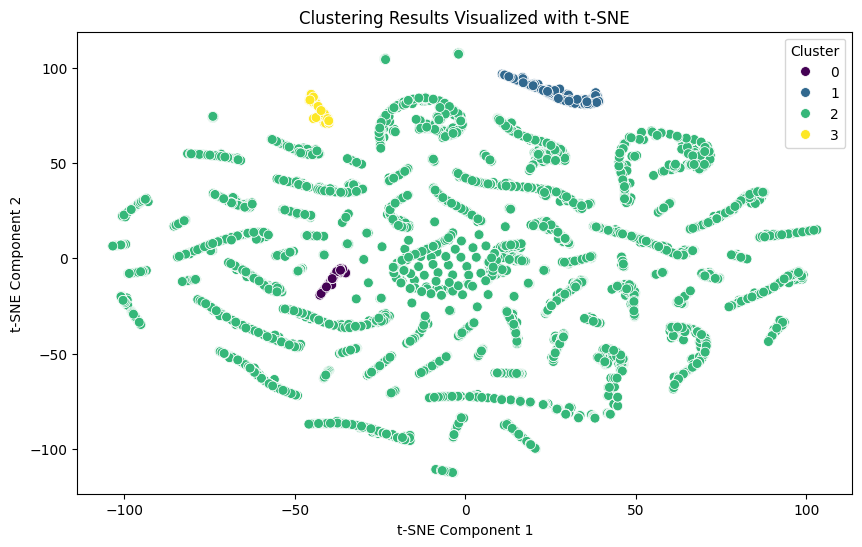

In [34]:
#Visualization with T-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_features)

df['TSNE1'] = tsne_features[:, 0]
df['TSNE2'] = tsne_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df, palette='viridis', s=50)
plt.title('Clustering Results Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()


## **Platform**

In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
platforms_encoded = encoder.fit_transform(df[['Platforms Info']]).toarray()

platforms_df = pd.DataFrame(platforms_encoded, columns=encoder.get_feature_names_out(['Platforms Info']))


In [36]:
platform_features = pd.concat(
    [platforms_df.reset_index(drop=True),
     df[['User Score', 'Total rating']].reset_index(drop=True)],
    axis=1
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_platform_features = scaler.fit_transform(platform_features)


In [37]:
from sklearn.cluster import KMeans

n_clusters = 4
kmeans_platform = KMeans(n_clusters=n_clusters, random_state=42)
platform_clusters = kmeans_platform.fit_predict(scaled_platform_features)

df['Platform Cluster'] = platform_clusters


In [38]:
print("Length of clusters:", len(df['Platform Cluster']))
print("Number of rows in data:", df.shape[0])

Length of clusters: 11299
Number of rows in data: 11299


In [39]:
platform_analysis = df.groupby('Platform Cluster')[['User Score', 'Total rating']].mean()
print(platform_analysis)

platform_cluster_distribution = df.groupby('Platform Cluster')['Platforms Info'].value_counts()
print(platform_cluster_distribution)

                  User Score  Total rating
Platform Cluster                          
0                   7.800000    187.200000
1                   6.922229   1771.022849
2                   4.900000    107.800000
3                   5.800000   1670.400000
Platform Cluster  Platforms Info                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
0                 [{'Platform': 'Wi

In [40]:
tsne = TSNE(n_components=2, random_state=42)
reduced_platform_features = tsne.fit_transform(scaled_platform_features)

df['TSNE_Platform1'] = reduced_platform_features[:, 0]
df['TSNE_Platform2'] = reduced_platform_features[:, 1]

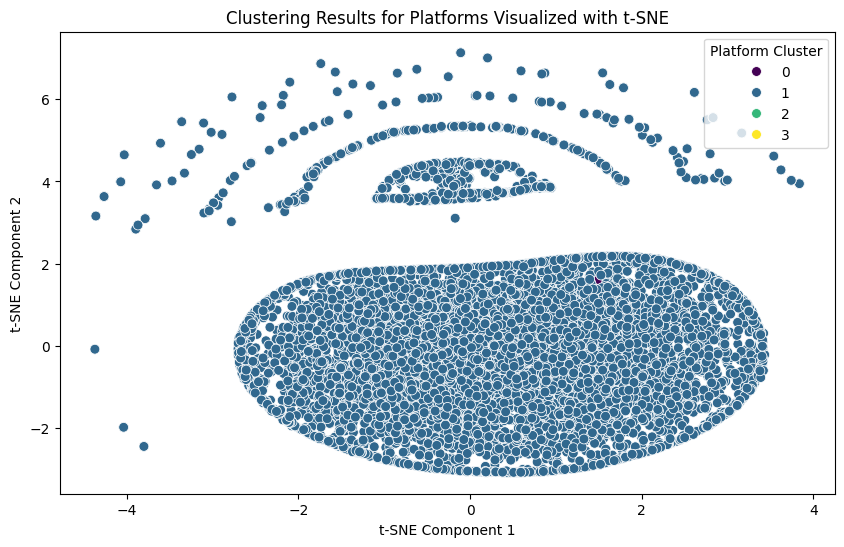

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='TSNE_Platform1',
    y='TSNE_Platform2',
    hue='Platform Cluster',
    data=df,
    palette='viridis',
    s=50
)
plt.title('Clustering Results for Platforms Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Platform Cluster', loc='upper right')
plt.show()
